# Processamento de Linguagem Natural - Unifacisa

In [ ]:
# 1. Revisão
# 2. Análise de textos financeiros
# 3. Buscas com TF-IDF (chatbot)
# 4. Sumarização de documentos
# 5. Similaridade entre strings
# 6. Classificação de sentimentos (base emoções, textos financeiros e Twitter)

## 1. Importação das bibliotecas

In [ ]:
import urllib.request
import bs4 as bs # beautiful soup
import re # regular expression
import nltk # natural language toolkit
import spacy # spacy.org
import string
import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download pt

## 2. Tokenização, lematização e stemização

In [ ]:
pln = spacy.load('pt') # en
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguagem natural. Curso em Campina Grande')

In [ ]:
t = 'Estou aprendendo processamento de linguagem natural. Curso em Campina Grande dr. joão'

In [ ]:
# Tokenização
t.split('.')

['Estou aprendendo processamento de linguagem natural',
 ' Curso em Campina Grande dr',
 ' joão']

In [ ]:
for token in documento:
  print(token.text, token.pos_) # part of speech

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
. PUNCT
Curso NOUN
em ADP
Campina PROPN
Grande PROPN


In [ ]:
for token in documento:
  if token.pos_ == 'PROPN':
    print(token.text)

Campina
Grande


In [ ]:
# Lematização
for token in documento:
  print(token.text, ' - ', token.lemma_)

Estou  -  Estou
aprendendo  -  aprender
processamento  -  processamento
de  -  de
linguagem  -  linguagem
natural  -  natural
.  -  .
Curso  -  Curso
em  -  em
Campina  -  Campina
Grande  -  Grande


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei estante jones')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar',
 'estante',
 'jones']

In [ ]:
# Stemização - radical da palavra
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('jon') # estante = estou

'jon'

In [ ]:
for token in documento:
  print(token.text, ' - ', token.lemma_, ' - ', stemmer.stem(token.text))

Estou  -  Estou  -  est
aprendendo  -  aprender  -  aprend
processamento  -  processamento  -  process
de  -  de  -  de
linguagem  -  linguagem  -  lingu
natural  -  natural  -  natur
.  -  .  -  .
Curso  -  Curso  -  curs
em  -  em  -  em
Campina  -  Campina  -  campin
Grande  -  Grande  -  grand


## 3. Extração de texto de páginas web



In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"YEoZgmBlEo4ukB64-jx5pwAAAQQ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":60357171,"wgRevisionId":60357171,"wgArticleId":12722,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 manut: Nomes m\xc3\xbaltiplos: lista de autor

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

65

In [ ]:
paragrafos[0]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicos através de adaptação flexível”.<sup class="reference" i

In [ ]:
paragrafos[0].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicos através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir máquinas inteligentes". É uma área de p

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

In [ ]:
# artificial <> Artificial
conteudo = conteudo.lower()
conteudo

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.word_tokenize(conteudo)

In [ ]:
lista_sentencas = nltk.sent_tokenize(conteudo)

In [ ]:
lista_sentencas

['inteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico.',
 'os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso.',
 'andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicos através de adaptação flexível”.',
 '[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia de produzir máquinas inteligentes".',

In [ ]:
len(lista_sentencas)

229

## 4. Pré-processamento dos textos

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [ ]:
type(stop_words)

set

In [ ]:
# de
# feliz - positivo
# medo - negativo
print(stop_words)

{'ambas', 'tivemos', 'esteve', 'pouca', 'ser', 'podia', 'poderá', 'muito', 'quer', 'estado', 'estão', 'um', 'nove', 'elas', 'este', 'menor', 'sabe', 'fim', 'vezes', 'fazeis', 'dar', 'final', 'para', 'lhe', 'pela', 'tais', 'doze', 'se', 'são', 'posição', 'exemplo', 'primeiro', 'usa', 'deste', 'faço', 'fez', 'embora', 'teus', 'ali', 'aos', 'conselho', 'somente', 'tal', 'custa', 'nossa', 'aqui', 'baixo', 'eventual', 'qualquer', 'de', 'dezanove', 'ter', 'quinta', 'nova', 'estive', 'geral', 'numa', 'vindo', 'com', 'tem', 'fomos', 'pontos', 'quarto', 'sem', 'momento', 'tive', 'uma', 'dentro', 'aquilo', 'porquanto', 'tanto', 'vens', 'povo', 'dezoito', 'área', 'número', 'pelo', 'sétima', 'quando', 'pelas', 'forma', 'quieto', 'diz', 'só', 'estiveram', 'coisa', 'comprida', 'dizem', 'daquela', 'porém', 'depois', 'tanta', 'cento', 'meus', 'tentar', 'três', 'lado', 'meu', 'aquelas', 'ambos', 'logo', 'vais', 'quanto', 'oitava', 'mil', 'falta', 'estou', 'os', 'corrente', 'ora', 'possível', 'esses', '

In [ ]:
len(stop_words)

413

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  texto = texto.lower()
  # URLs
  # relugar expression # ab.com.br ba.com.br/atendimento
  # @usuario
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Tokenização
  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_) # token.text
    #lista.append(token.text)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  #return texto
  return lista

In [ ]:
texto_teste = preprocessamento('Estou . aprendendo a técnica de processamento de linguagem natural https://www.iaexpert.academy ')
texto_teste

'aprendendo a técnica processamento linguagem natural'

In [ ]:
conteudo

'inteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicos através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia de produzir máquinas inteligentes". é uma área de p

In [ ]:
conteudo = preprocessamento(conteudo)
conteudo

'inteligência artificial mencionada sigla português ia sigla inglês ai artificial intelligence a inteligência similar humana exibida sistemas software campo estudo acadêmico principais pesquisadores e livros didáticos definem o campo o estudo e projeto agentes inteligentes agente inteligente percebe ambiente e toma atitudes maximizam chances sucesso andreas kaplan e michael haenlein definem a inteligência artificial “ capacidade interpretar corretamente dados externos aprender a d dados e utilizar aprendizagens atingir objetivos e tarefas específicos adaptação flexível”.[1 john mccarthy cunhou o termo conferência especialistas celebrada darmouth colege gubern román o eros eletrónico a define a ciência e engenharia produzir máquinas inteligentes pesquisa computação dedicada a buscar métodos dispositivos computacionais possuam multipliquem a capacidade racional humano resolver problemas pensar ampla inteligente definida o ramo ciência computação ocupa comportamento inteligente[2 o estudo

## 3. Exploração dos textos

### Termos frequentes

In [ ]:
conteudo_tokenizado = nltk.tokenize.word_tokenize(conteudo)

In [ ]:
conteudo_tokenizado

In [ ]:
frenquencia = nltk.FreqDist(conteudo_tokenizado)
mais_comuns = frenquencia.most_common(20)
mais_comuns

[('a', 222),
 ('o', 172),
 ('e', 162),
 ('inteligência', 88),
 ('ia', 64),
 ('artificial', 61),
 ('[', 39),
 ('.', 28),
 ('humano', 27),
 ('máquina', 27),
 ('sistemas', 19),
 ('problemas', 18),
 ('máquinas', 17),
 ('computador', 17),
 ('forte', 17),
 ('d', 16),
 ('turing', 15),
 ('humana', 14),
 ('teste', 13),
 ('estudo', 12)]

### Nuvem de palavras

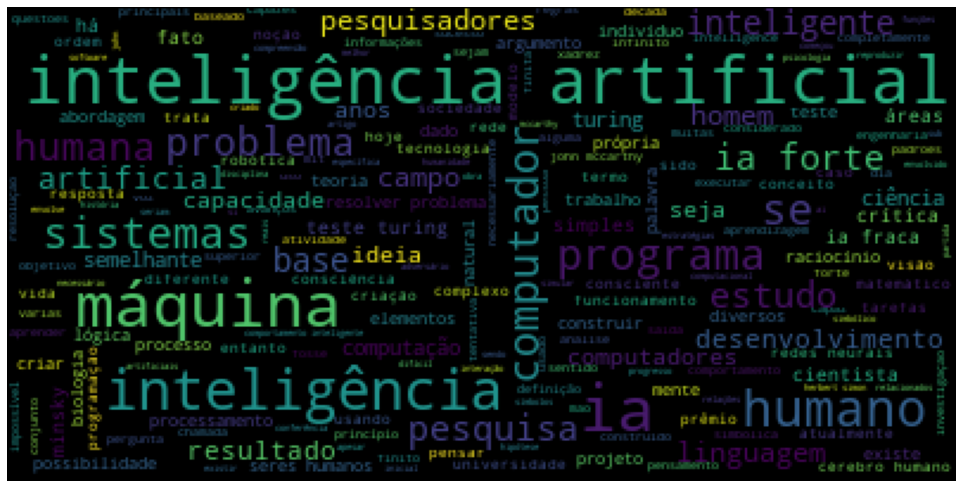

In [ ]:
# Apagar palavras com menos de 1 caractere
# Retirar a lematização

from wordcloud import WordCloud
plt.figure(figsize=(17,17))
plt.axis('off')
plt.imshow(WordCloud().generate(conteudo));

### Detecção de idiomas

In [ ]:
!pip install spacy-langdetect

In [ ]:
from spacy_langdetect import LanguageDetector
pln = spacy.load('pt')
pln

In [ ]:
pln.add_pipe(LanguageDetector(), name='language_detector', last=True)
doc = pln(conteudo)
print(doc._.language)

{'language': 'pt', 'score': 0.9999979503867414}


In [ ]:
doc = pln('This is an English text')
print(doc._.language)

{'language': 'en', 'score': 0.9999964907128946}


### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
from spacy import displacy
documento = pln(conteudo)
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
for entidade in documento.ents:
  if entidade.label_ == 'LOC':
    print(entidade.text, entidade.label_)

ella LOC
brasil LOC
estados unidos LOC
japão LOC
boston LOC
universidade pensilvânia LOC
eua LOC


## Atividade

- Escolha outra página web qualquer e execute os mesmos procedimentos mostrados acima. Como a visualização da nuvem de palavras não ficou muito boa devido à lematização, retire esse processo da função de pré-processamento

## 4. Buscas em textos

### Buscas com spaCy

In [ ]:
strings_busca = ['turing', 'agente']
lista_tokens = [pln(item) for item in strings_busca]

In [ ]:
lista_tokens

[turing, agente]

In [ ]:
pln.vocab # vocabulário

In [ ]:
# 170.000 palavras no total (400.000 PT)
# 20.000/30.000 que as pessoas conhecem
# 5.000 no cotidiano (NAN - Outra)

# carro, cachorro
# NAN, NAN

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab) # lista com todas as palavras
matcher.add('SEARCH', None, *lista_tokens)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 35, 36),
 (8661325627334373315, 1230, 1231),
 (8661325627334373315, 1234, 1235),
 (8661325627334373315, 1310, 1311),
 (8661325627334373315, 1313, 1314),
 (8661325627334373315, 1316, 1317),
 (8661325627334373315, 1344, 1345),
 (8661325627334373315, 1670, 1671),
 (8661325627334373315, 3036, 3037),
 (8661325627334373315, 3263, 3264),
 (8661325627334373315, 3338, 3339),
 (8661325627334373315, 3390, 3391),
 (8661325627334373315, 3467, 3468)]

In [ ]:
doc[1316:1317]

turing

In [ ]:
doc[35:36]

agente

In [ ]:
doc[1316-5:1317+5]

o teste turing derivem visão turing tinha o humano máquina 
 

In [ ]:
matches[0]

(8661325627334373315, 35, 36)

In [ ]:
search_strings_html = ' '.join([str(element) for element in strings_busca])
search_strings_html

'turing agente'

In [ ]:
number_of_words = 50
marked_text = ''
from IPython.core.display import HTML
display(HTML(f'<h1>{search_strings_html.upper()}</h1>'))
display(HTML(f"""<p>
                    <strong>Number of matches:</strong> {len(matches)}
                 </p>"""))
for i in matches:
    start = i[1] - number_of_words
    if start < 0:
      start = 0
    for j in range(len(lista_tokens)):
      if doc[i[1]:i[2]].similarity(lista_tokens[j]) == 1.0:
        search_text = str(lista_tokens[j])
        marked_text += str(doc[start:i[2] + number_of_words]).replace(search_text, f"<mark>{search_text}</mark>")
        marked_text += "<br /><br />"
display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))

/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead 

### Atividade

- Realizar a busca utilizando a página web da atividade anterior

### Buscas com TF-IDF e similaridade do cosseno

#### Bag of words

- *Este é o primeiro documento*
- *Este documento é o segundo documento*

**- este é o primeiro segundo documento**
- 1 1 1 1 0 1
- 1 1 1 0 1 2

- Palavras muito frequentes "dominam" o documento e podem não representar tanta informação sobre o contexto
- Maiores "pesos" para documentos longos do que para documentos pequenos

#### TF-IDF (Term frequency - inverse document frequency)

- Redimensionar a frequência das palavras pela frequência com que aparecem em todos os documentos
- **Term frequency (TF)**: frequência da palavra no documento atual - TF = (número de vezes que o termo **t** aparece no documento) / (número de termos no documento)
- **Inverse document frequency (IDF)**: quão rara é a palavra nos documentos - IDF = log(N/n), **N** é o número de documentos e **n** é o número de documentos que o termo **t** apareceu
- **TF-IDF**: importância de uma palavra para um documento em uma coleção ou corpus

- Considerando um documento com 100 palavras no qual a palavra cachorro aparece 5 vezes
- TF = 5 / 100 = 0.05
- Temos 100 documentos no total (N) e a palavra cachorro aparece aparece em 20 desses documentos (n)
- IDF = log(100 / 20) = 0.69
- TF-IDF = 0.05 * 0.69 = 0.034

- Quanto maior o valor do peso, mais raro é o termo. Quanto menor o peso, mais comum é o termo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# utilizar a lematização
lista_sentencas_preprocessada = []
for i in range(len(lista_sentencas)): # originais sem pré-processamento
  lista_sentencas_preprocessada.append(preprocessamento(lista_sentencas[i]))

In [ ]:
import random
for _ in range(5):
  i = random.randint(0, len(lista_sentencas) - 1)
  print(lista_sentencas[i])
  print(lista_sentencas_preprocessada[i])
  print('-----')

um sistema que utiliza inteligência artificial pode armazenar e analisar bilhões de dados, realizar automaticamente tarefas com base nessa análise, fechar acordos, vender, controlar uma linha de produção etc., mas não é capaz de criar estratégias do zero.
utilizar inteligência artificial armazenar e analisar bilião realizar automaticamente tarefar base n análise fechar acordo vender controlar umar linha produção etc capaz criar estratégia
-----
[3]
a questão sobre o que é "inteligência artificial", mesmo como definida anteriormente, pode ser separada em duas partes: "qual a natureza do artificial" e "o que é inteligência".

 o sobrar o inteligência artificial comer definir anteriormente separar o natureza artificial e o inteligência
-----
a missão de lenat, no longo ciclo do projeto cyc, iniciado em 1984, era de construir a base de uma inteligência artificial geral ao representar manualmente o conhecimento como axiomas lógicos contextualizados na linguagem formal com base em extensões 

In [ ]:
frases_teste = lista_sentencas_preprocessada[:3]
frases_teste

['inteligência artificial vezar mencionar pelar sigla português pelar sigla inglês ai artificial intelligence o inteligência similar humano exibir software campar estudar acadêmico',
 'o principal pesquisador e livro didáticos definir o campar comer o estudar e projeto agente inteligente agente inteligente perceber ambientar e tomar atitude maximizar suar chance sucesso',
 'andreas kaplan e michael haenlein definir o inteligência artificial comer “ umar capacidade parir interpretar corretamente externo aprender o d e utilizar aprendizagem parir atingir objetivos e tarefar específico adaptação flexível ”']

In [ ]:
frases_teste.append(frases_teste[0])
frases_teste

['inteligência artificial vezar mencionar pelar sigla português pelar sigla inglês ai artificial intelligence o inteligência similar humano exibir software campar estudar acadêmico',
 'o principal pesquisador e livro didáticos definir o campar comer o estudar e projeto agente inteligente agente inteligente perceber ambientar e tomar atitude maximizar suar chance sucesso',
 'andreas kaplan e michael haenlein definir o inteligência artificial comer “ umar capacidade parir interpretar corretamente externo aprender o d e utilizar aprendizagem parir atingir objetivos e tarefar específico adaptação flexível ”',
 'inteligência artificial vezar mencionar pelar sigla português pelar sigla inglês ai artificial intelligence o inteligência similar humano exibir software campar estudar acadêmico']

In [ ]:
vetores_palavras = TfidfVectorizer()
palavras_vetorizadas = vetores_palavras.fit_transform(frases_teste)

In [ ]:
type(palavras_vetorizadas)

scipy.sparse.csr.csr_matrix

In [ ]:
# 20.000
palavras_vetorizadas

<4x53 sparse matrix of type '<class 'numpy.float64'>'
	with 76 stored elements in Compressed Sparse Row format>

In [ ]:
print(vetores_palavras.get_feature_names())

['acadêmico', 'adaptação', 'agente', 'ai', 'ambientar', 'andreas', 'aprender', 'aprendizagem', 'artificial', 'atingir', 'atitude', 'campar', 'capacidade', 'chance', 'comer', 'corretamente', 'definir', 'didáticos', 'específico', 'estudar', 'exibir', 'externo', 'flexível', 'haenlein', 'humano', 'inglês', 'inteligente', 'inteligência', 'intelligence', 'interpretar', 'kaplan', 'livro', 'maximizar', 'mencionar', 'michael', 'objetivos', 'parir', 'pelar', 'perceber', 'pesquisador', 'português', 'principal', 'projeto', 'sigla', 'similar', 'software', 'suar', 'sucesso', 'tarefar', 'tomar', 'umar', 'utilizar', 'vezar']


In [ ]:
len(vetores_palavras.get_feature_names())

53

In [ ]:
print(vetores_palavras.vocabulary_)

{'inteligência': 27, 'artificial': 8, 'vezar': 52, 'mencionar': 33, 'pelar': 37, 'sigla': 43, 'português': 40, 'inglês': 25, 'ai': 3, 'intelligence': 28, 'similar': 44, 'humano': 24, 'exibir': 20, 'software': 45, 'campar': 11, 'estudar': 19, 'acadêmico': 0, 'principal': 41, 'pesquisador': 39, 'livro': 31, 'didáticos': 17, 'definir': 16, 'comer': 14, 'projeto': 42, 'agente': 2, 'inteligente': 26, 'perceber': 38, 'ambientar': 4, 'tomar': 49, 'atitude': 10, 'maximizar': 32, 'suar': 46, 'chance': 13, 'sucesso': 47, 'andreas': 5, 'kaplan': 30, 'michael': 34, 'haenlein': 23, 'umar': 50, 'capacidade': 12, 'parir': 36, 'interpretar': 29, 'corretamente': 15, 'externo': 21, 'aprender': 6, 'utilizar': 51, 'aprendizagem': 7, 'atingir': 9, 'objetivos': 35, 'tarefar': 48, 'específico': 18, 'adaptação': 1, 'flexível': 22}


In [ ]:
print(vetores_palavras.idf_)

[1.51082562 1.91629073 1.91629073 1.51082562 1.91629073 1.91629073
 1.91629073 1.91629073 1.22314355 1.91629073 1.91629073 1.22314355
 1.91629073 1.91629073 1.51082562 1.91629073 1.51082562 1.91629073
 1.91629073 1.22314355 1.51082562 1.91629073 1.91629073 1.91629073
 1.51082562 1.51082562 1.91629073 1.22314355 1.51082562 1.91629073
 1.91629073 1.91629073 1.91629073 1.51082562 1.91629073 1.91629073
 1.91629073 1.51082562 1.91629073 1.91629073 1.51082562 1.91629073
 1.91629073 1.51082562 1.51082562 1.51082562 1.91629073 1.91629073
 1.91629073 1.91629073 1.91629073 1.91629073 1.51082562]


In [ ]:
palavras_vetorizadas.todense()

matrix([[0.19781901, 0.        , 0.        , 0.19781901, 0.        ,
         0.        , 0.        , 0.        , 0.32030307, 0.        ,
         0.        , 0.16015154, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16015154,
         0.19781901, 0.        , 0.        , 0.        , 0.19781901,
         0.19781901, 0.        , 0.32030307, 0.19781901, 0.        ,
         0.        , 0.        , 0.        , 0.19781901, 0.        ,
         0.        , 0.        , 0.39563802, 0.        , 0.        ,
         0.19781901, 0.        , 0.        , 0.39563802, 0.19781901,
         0.19781901, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.19781901],
        [0.        , 0.        , 0.41650395, 0.        , 0.20825197,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.20825197, 0.13292454, 0.        , 0.20825197, 0.16418825,
         0.        , 0.16418825, 0.20825197, 0.        , 

In [ ]:
palavras_vetorizadas.todense().shape

(4, 53)

#### Entendimento similaridade cosseno

- Link: https://en.wikipedia.org/wiki/Cosine_similarity
- Cálculos passo a passo: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/
- Temos duas matrizes: TF e IDF
- Cosine Similarity (d1, d2) =  Dot product(d1, d2) / ||d1|| * ||d2||

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
palavras_vetorizadas[0].todense()

In [ ]:
cosine_similarity(palavras_vetorizadas[0], palavras_vetorizadas[1])

In [ ]:
cosine_similarity(palavras_vetorizadas[0], palavras_vetorizadas[3])

In [ ]:
similaridade = cosine_similarity(palavras_vetorizadas[0], palavras_vetorizadas)
similaridade

In [ ]:
similaridade.argsort()

In [ ]:
i = similaridade.argsort()[0][-2]
i

In [ ]:
i = i.flatten()
i

### Simulação de um chatbot

In [ ]:
textos_boas_vindas_entrada = ('hey', 'olá', 'opa', 'oi', 'eae')
textos_boas_vindas_respostas = ('hey', 'olá', 'opa', 'oi', 'bem-vindo', 'como você está?')

In [ ]:
'olá tudo bem'.split()

In [ ]:
def responder_saudacao(texto):
  for palavra in texto.split():
    if palavra.lower() in textos_boas_vindas_entrada:
      return random.choice(textos_boas_vindas_respostas)  

In [ ]:
responder_saudacao('olá tudo bem?')

In [ ]:
def responder(texto_usuario):
  resposta_chatbot = ''
  lista_sentencas_preprocessada.append(texto_usuario)

  tfidf = TfidfVectorizer()
  palavras_vetorizadas = tfidf.fit_transform(lista_sentencas_preprocessada)

  similaridade = cosine_similarity(palavras_vetorizadas[-1], palavras_vetorizadas)

  indice_sentenca = similaridade.argsort()[0][-2]
  vetor_similar = similaridade.flatten()
  vetor_similar.sort()
  vetor_encontrado = vetor_similar[-2]

  if (vetor_encontrado == 0):
    resposta_chatbot = resposta_chatbot + 'Desculpe, mas não entendi!'
    return resposta_chatbot
  else:
    resposta_chatbot = resposta_chatbot + lista_sentencas[indice_sentenca]
    return resposta_chatbot

In [ ]:
continuar = True
print('Olá, sou um chatbot e vou responder perguntas sobre inteligência artificial: ')
while (continuar == True):
  texto_usuario = input()
  texto_usuario = texto_usuario.lower()
  if (texto_usuario != 'sair'):
    if (responder_saudacao(texto_usuario) != None):
      print('Chatbot: ' + responder_saudacao(texto_usuario))
    else:
      print('Chatbot: ')
      print(responder(preprocessamento(texto_usuario)))
      lista_sentencas_preprocessada.remove(preprocessamento(texto_usuario))
  else:
    continuar = False
    print('Chatbot: Até breve!')

## Atividade

- Testar o chatbot com o texto utilizado nas etapas anteriores

## 5. Sumarização de documentos

In [ ]:
!pip install goose3

In [ ]:
from goose3 import Goose

In [ ]:
g = Goose()
url = 'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'
artigo = g.extract(url)

In [ ]:
artigo.infos

In [ ]:
artigo.title

In [ ]:
artigo.links

In [ ]:
artigo.cleaned_text

In [ ]:
artigo_original = artigo.cleaned_text
artigo_original

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

In [ ]:
def preprocessamento(texto):
  texto_formatado = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(texto_formatado):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

In [ ]:
artigo_formatado = preprocessamento(artigo_original)
artigo_formatado

In [ ]:
frequencia_palavras = nltk.FreqDist(nltk.word_tokenize(artigo_formatado))
frequencia_palavras

In [ ]:
frequencia_palavras['inteligência']

In [ ]:
frequencia_palavras.keys()

In [ ]:
frequencia_maxima = max(frequencia_palavras.values())

In [ ]:
frequencia_maxima

In [ ]:
for palavra in frequencia_palavras.keys():
  frequencia_palavras[palavra] = (frequencia_palavras[palavra] / frequencia_maxima)

In [ ]:
frequencia_palavras

In [ ]:
lista_sentencas = nltk.sent_tokenize(artigo_original)
lista_sentencas

In [ ]:
nota_sentencas = {}
for sentenca in lista_sentencas:
  #print(sentenca)
  for palavra in nltk.word_tokenize(sentenca.lower()):
    #print(palavra)
    if palavra in frequencia_palavras.keys():
      if sentenca not in nota_sentencas.keys():
        nota_sentencas[sentenca] = frequencia_palavras[palavra]
      else:
        nota_sentencas[sentenca] += frequencia_palavras[palavra]

In [ ]:
nota_sentencas

In [ ]:
import heapq
melhores_sentencas = heapq.nlargest(15, nota_sentencas, key=nota_sentencas.get)

In [ ]:
melhores_sentencas

In [ ]:
resumo = ' '.join(melhores_sentencas)
resumo

In [ ]:
artigo_original

In [ ]:
from IPython.core.display import HTML
texto = ''

display(HTML(f'<h1>Resumo do texto</h1>'))
for sentenca in lista_sentencas:
  #texto += sentenca
  if sentenca in melhores_sentencas:
    texto += str(sentenca).replace(sentenca, f"<mark>{sentenca}</mark>")
  else:
    texto += sentenca
display(HTML(f"""{texto}"""))

### Atividade

- Testar o sumarizador com outros textos

## 6. Similaridade entre strings

### Distância de edição (Levenshtein)

- https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_Levenshtein#:~:text=Em%20teoria%20da%20informa%C3%A7%C3%A3o%2C%20a,transformar%20um%20string%20no%20outro.
- Quantas inserções, exclusões e substituições são necessárias para converter uma string em outra
- Exemplo: pai e cai: 1 substituição

In [ ]:
from nltk.metrics.distance import edit_distance

In [ ]:
edit_distance('rain', 'shine')

In [ ]:
edit_distance('rain', 'shine')

In [ ]:
edit_distance('Analista de Dados', 'Analista de dados')

### Similaridade n-grama

- n-grama é uma forma de expressar cada sequência consecutiva possível de n tokens de um texto
- Computamos os "bigramas" para todos os tokens de duas strings e pontuamos a similaridade contando o número de bigramas comuns
- Outras métricas para avaliação: https://tedboy.github.io/nlps/generated/generated/nltk.BigramAssocMeasures.html

In [ ]:
'analista de business intelligence'.split()

In [ ]:
bigramas_cargo1 = list(nltk.bigrams('analista de business intelligence'.split(), pad_right=True, pad_left=True))
bigramas_cargo1

In [ ]:
bigramas_cargo1 = list(nltk.bigrams('analista de business intelligence'.split(), pad_right=True, pad_left=True))
bigramas_cargo1

In [ ]:
bigramas_cargo3 = list(nltk.bigrams('analista de dados'.split(), pad_right=True, pad_left=True))
bigramas_cargo3

In [ ]:
set(['A', 'B', 'C']).intersection(set(['C', 'D', 'E']))

In [ ]:
set(['A', 'B', 'C']).intersection(set(['C', 'D', 'E']))

In [ ]:
set(['A', 'B', 'C']).intersection(set(['C', 'D', 'E']))

In [ ]:
set(['A', 'B', 'C']).intersection(set(['C', 'D', 'E']))

In [ ]:
set(['A', 'B', 'C']).intersection(set(['C', 'D', 'E']))

### Distância de Jaccard

- Número de itens em comum dividido pelo número total de itens distintos em dois conjuntos
- Usa n-gramas
- https://en.wikipedia.org/wiki/Jaccard_index

In [ ]:
cargo1 = 'analista de business intelligence'.split()
cargo2 = 'cientista de dados'.split()
cargo3 = 'analista de dados'.split()

In [ ]:
cargo1, cargo2, cargo3

In [ ]:
# Cargo 1 x Cargo 3

In [ ]:
intersecao = set(cargo1).intersection(set(cargo3))
intersecao

In [ ]:
uniao = set(cargo1).union(set(cargo3))
uniao

In [ ]:
len(intersecao), len(uniao)

In [ ]:
(len(uniao) - len(intersecao)) / len(uniao)

In [ ]:
from nltk.metrics.distance import jaccard_distance

In [ ]:
# Cargo 1 x Cargo 3
jaccard_distance(set(cargo1), set(cargo3))

In [ ]:
# Cargo 1 x Cargo 2
jaccard_distance(set(cargo1), set(cargo2))

In [ ]:
# Cargo 2 x Cargo 3
jaccard_distance(set(cargo2), set(cargo3))

In [ ]:
# Cargo 1 x Cargo 1
jaccard_distance(set(cargo1), set(cargo1))

### Atividade

- Testar as funções com nomes de cidades diferentes